In [879]:
import numpy as np
import os
os.chdir(r'C:\Users\LENOVO\Desktop\cours\S5\Datamining\Dataset')
cwd = os.getcwd()
print(cwd)

C:\Users\LENOVO\Desktop\cours\S5\Datamining\Dataset


In [880]:
#Partie A
#QUESTION A.1

In [881]:
import pandas as pd
df = pd.read_csv(r'diabets.txt', delimiter = "\t")
df

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
0,59,2,32.1,101.00,157,93.2,38.0,4.00,4.8598,87,151
1,48,1,21.6,87.00,183,103.2,70.0,3.00,3.8918,69,75
2,72,2,30.5,93.00,156,93.6,41.0,4.00,4.6728,85,141
3,24,1,25.3,84.00,198,131.4,40.0,5.00,4.8903,89,206
4,50,1,23.0,101.00,192,125.4,52.0,4.00,4.2905,80,135
...,...,...,...,...,...,...,...,...,...,...,...
437,60,2,28.2,112.00,185,113.8,42.0,4.00,4.9836,93,178
438,47,2,24.9,75.00,225,166.0,42.0,5.00,4.4427,102,104
439,60,2,24.9,99.67,162,106.6,43.0,3.77,4.1271,95,132
440,36,1,30.0,95.00,201,125.2,42.0,4.79,5.1299,85,220


In [882]:
#Partie A
#QUESTION A.2

In [883]:
df.columns

Index(['AGE', 'SEX', 'BMI', 'BP', 'S1', 'S2', 'S3', 'S4', 'S5', 'S6', 'Y'], dtype='object')

In [884]:
df.describe()

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
count,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000
mean,48.518100,1.468326,26.375792,94.647014,189.140271,115.439140,49.788462,4.070249,4.641411,91.260181,152.133484
std,13.109028,0.499561,4.418122,13.831283,34.608052,30.413081,12.934202,1.290450,0.522391,11.496335,77.093005
min,19.000000,1.000000,18.000000,62.000000,97.000000,41.600000,22.000000,2.000000,3.258100,58.000000,25.000000
25%,38.250000,1.000000,23.200000,84.000000,164.250000,96.050000,40.250000,3.000000,4.276700,83.250000,87.000000
50%,50.000000,1.000000,25.700000,93.000000,186.000000,113.000000,48.000000,4.000000,4.620050,91.000000,140.500000
75%,59.000000,2.000000,29.275000,105.000000,209.750000,134.500000,57.750000,5.000000,4.997200,98.000000,211.500000
max,79.000000,2.000000,42.200000,133.000000,301.000000,242.400000,99.000000,9.090000,6.107000,124.000000,346.000000


In [885]:
df.dtypes

AGE      int64
SEX      int64
BMI    float64
BP     float64
S1       int64
S2     float64
S3     float64
S4     float64
S5     float64
S6       int64
Y        int64
dtype: object

In [886]:
import seaborn as sns

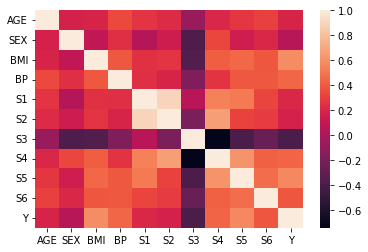

In [887]:
ax = sns.heatmap(df.corr())

In [888]:
from sklearn.preprocessing import MinMaxScaler

In [889]:
data = df.copy()

In [890]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

In [891]:
scaled_data

array([[0.66666667, 1.        , 0.58264463, ..., 0.562217  , 0.43939394,
        0.39252336],
       [0.48333333, 0.        , 0.14876033, ..., 0.22243673, 0.16666667,
        0.15576324],
       [0.88333333, 1.        , 0.51652893, ..., 0.49657763, 0.40909091,
        0.36137072],
       ...,
       [0.68333333, 1.        , 0.28512397, ..., 0.30503001, 0.56060606,
        0.33333333],
       [0.28333333, 0.        , 0.49586777, ..., 0.65702552, 0.40909091,
        0.60747664],
       [0.28333333, 0.        , 0.0661157 , ..., 0.46930394, 0.51515152,
        0.09968847]])

In [892]:
#Partie A
#QUESTION A.3

In [893]:
X = df.drop("Y",axis =1)
y = df["Y"]

In [894]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(X,y,test_size = 0.3)

In [895]:
norm = MinMaxScaler().fit(X_train)

X_train_norm = norm.transform(X_train)

X_test_norm = norm.transform(X_test)

In [896]:
#Partie A
#QUESTION A.4

In [897]:
from sklearn.linear_model import LinearRegression

In [898]:
model = LinearRegression()

model.fit(X_train_norm, Y_train)
model.score(X_test_norm, Y_test)

0.43746542771969354

In [899]:
#Partie A
#QUESTION A.5

In [900]:
model.coef_

array([ -14.56352687,  -26.07200303,  163.85459285,   80.89418517,
       -127.62790415,   67.02067131,   -2.38670294,   39.03890324,
        157.08124488,   13.33420873])

In [901]:
#Partie A
#QUESTION A.6

In [902]:
y_pred = model.predict(X_test_norm)

In [903]:
y_pred

array([120.64749722,  41.73397705,  87.81191723,  60.35870193,
       169.85753795, 152.09124965, 153.15786388, 265.94211502,
       117.12433893, 174.95556932,  88.99176954,  96.7859098 ,
       133.66381477, 134.41904965,  76.0127636 , 258.08521035,
       126.76388656, 179.22897616,  98.19734585, 106.13010851,
       125.64211896, 284.4691863 ,  90.44292286, 230.33417507,
       147.41342704, 259.29977692, 225.9836714 , 123.98531228,
       147.28458526, 218.67346635,  85.99507859, 125.47748392,
       196.02543252, 195.56491912, 173.33581558, 148.93546519,
       237.8466792 , 195.75220747, 107.69467971, 134.26501718,
        78.10709907, 183.22381401, 194.17242455,  89.01696755,
       117.54667928, 152.01107673,  53.88075349, 159.29598543,
       116.2909988 ,  42.36974477,  57.74215244, 211.86769312,
        75.02262467, 172.7668928 , 165.11476431, 136.78619597,
       225.28332493, 102.35787752, 238.15443766, 166.98935977,
       127.09924009, 145.605702  , 117.07371831, 204.88

In [904]:
from sklearn.metrics import mean_squared_error, explained_variance_score , mean_absolute_error 

In [905]:
mean_squared_error(Y_test, y_pred)

3361.8459575847246

In [906]:
mean_absolute_error(Y_test, y_pred)

47.4906073858311

In [907]:
explained_variance_score(Y_test, y_pred)

0.4383579298926936

In [908]:
#Partie A
#QUESTION A.7

In [909]:
import statsmodels.api as sm


y_sm = df['Y']
X_sm = df[['AGE', 'SEX']]
#X_sm = sm.add_constant(X_sm)
model_sm = sm.OLS(y_sm, X_sm).fit()

In [910]:
#Partie A
#QUESTION A.8

In [911]:
model_sm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      Y   R-squared (uncentered):                   0.787
Model:                            OLS   Adj. R-squared (uncentered):              0.786
Method:                 Least Squares   F-statistic:                              814.6
Date:                Wed, 24 Nov 2021   Prob (F-statistic):                   1.21e-148
Time:                        22:51:45   Log-Likelihood:                         -2556.4
No. Observations:                 442   AIC:                                      5117.
Df Residuals:                     440   BIC:                                      5125.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
AGE            2.2984      0.201     11.428      0.000       1.903       2.694
SEX           24.4038      6.517      3.744      0.000      11.595      37.213
==============================================================================
Omnibus:                       28.141   Durbin-Watson:                   1.946
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               18.744
Skew:                           0.380   Prob(JB):                     8.51e-05
Kurtosis:                       2.336   Cond. No.                         87.4
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [912]:
#Partie A
#QUESTION A.9

In [913]:
import matplotlib.pyplot as plt

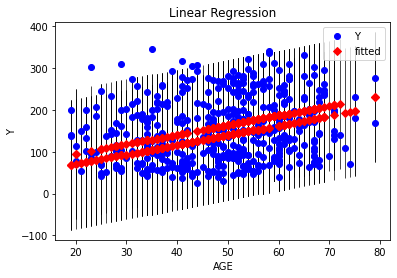

In [914]:
X["constant"] = 1
fig, ax = plt.subplots()
fig = sm.graphics.plot_fit(model_sm, 0, ax=ax)
ax.set_ylabel("Y")
ax.set_xlabel("AGE")
ax.set_title("Linear Regression")
plt.show()

In [915]:
#Partie B
#QUESTION B.1

In [916]:
from sklearn.linear_model import Lasso

In [917]:
lasso_reg = Lasso(alpha=50, max_iter=100, tol=0.1)
lasso_reg.fit(X_train, Y_train)

Lasso(alpha=50, max_iter=100, tol=0.1)

In [918]:
#Partie B
#QUESTION B.2

In [919]:
lasso_reg.score(X_test,Y_test)

0.3890424142632538

In [920]:
#Partie B
#QUESTION B.3

In [921]:
from sklearn.linear_model import Ridge

In [922]:
ridge_reg = Ridge(alpha=50, max_iter=100, tol=0.1)
ridge_reg.fit(X_train, Y_train)

Ridge(alpha=50, max_iter=100, tol=0.1)

In [923]:
#Partie B
#QUESTION B.4

In [924]:
lasso_reg.score(X_test,Y_test)

0.3890424142632538

In [925]:
#Partie B
#QUESTION B.5

In [926]:
from sklearn.model_selection import GridSearchCV

In [927]:
model_params = {
    'lasso': {
        'model': Lasso(),
        'params' : {
            'alpha': [10,30,50],
            'max_iter': [100,200,300],
            'tol': [0.1,0.5,0.9],

        }  
    },
    'ridge': {
        'model': Ridge(),
        'params' : {
            'alpha': [10,30,50],
            'max_iter': [100,200,300],
            'tol': [0.1,0.5,0.9],
        }
    }
}

In [928]:
scores = []

for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, Y_train)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    
df1 = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df1

,model,best_score,best_params
0,lasso,0.447029,"{'alpha': 10, 'max_iter': 100, 'tol': 0.1}"
1,ridge,0.474878,"{'alpha': 10, 'max_iter': 100, 'tol': 0.1}"


In [929]:
#Partie C
#QUESTION C.1

In [930]:
from sklearn.tree import DecisionTreeRegressor

In [931]:
regressor = DecisionTreeRegressor(criterion="friedman_mse", splitter="random", max_depth=600)

In [932]:
regressor.fit(X_train,Y_train)

DecisionTreeRegressor(criterion='friedman_mse', max_depth=600,
                      splitter='random')

In [933]:
#Partie C
#QUESTION C.2

In [934]:
regressor.score(X_test,Y_test)

-0.370696871628339

In [935]:
#Partie C
#QUESTION C.3

In [936]:
regressor1 = DecisionTreeRegressor(criterion="mae", splitter="random", max_depth=300, min_samples_split=5, min_samples_leaf=3, min_weight_fraction_leaf=0.3)
regressor1.fit(X_train,Y_train)

DecisionTreeRegressor(criterion='mae', max_depth=300, min_samples_leaf=3,
                      min_samples_split=5, min_weight_fraction_leaf=0.3,
                      splitter='random')

In [937]:
regressor1.score(X_test,Y_test)

0.07647183700042481

In [938]:
#Partie C
#QUESTION C.4

In [939]:
model_params = {
    'DecisionTreeReg': {
        'model': DecisionTreeRegressor(),
        'params' : {
            'criterion': ["mse", "friedman_mse", "mae", "poisson"],
            'splitter': ["best", "random"],
            'max_depth': [100,200,150],
            'min_samples_split': [1,3,5],
            'min_samples_leaf': [1,3,6]

        }  
    }
}

In [940]:
scores = []

for model_name, mp in model_params.items():
    clf1 =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf1.fit(X_train, Y_train)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    
df2 = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df2

C:\Users\LENOVO\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\LENOVO\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\LENOVO\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\tree\_classes.py", line 1252, in fit
    super().fit(
  File "C:\Users\LENOVO\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\tree\_classes.py", line 238, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\LE

,model,best_score,best_params
0,DecisionTreeReg,0.474878,"{'alpha': 10, 'max_iter': 100, 'tol': 0.1}"
